### TF-IDF

In [7]:
review_1_o = 'The movie was good and we really like movie'
review_2_o = 'the movie was good but the ending was boring'
review_3_o = 'we did not like the movie as it was too lengthy'

In [8]:
review_1_o = str(review_1_o).lower()
review_2_o = str(review_2_o).lower()
review_3_o = str(review_3_o).lower()

In [9]:
review_list = [review_1_o, review_2_o, review_3_o]

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(lowercase=True, stop_words='english')
tf_matrix = tv.fit_transform(review_list)

In [5]:
tf_names = tv.get_feature_names_out()
tf_names

# the words (or tokens) that have been extracted from corpus (in this case, the three reviews) after preprocessing 
# (removing stop words and applying TF-IDF transformation).

array(['boring', 'did', 'ending', 'good', 'lengthy', 'like', 'movie',
       'really'], dtype=object)

In [11]:
import pandas as pd
tbl = pd.DataFrame(tf_matrix.toarray(), columns=tf_names)
tbl

,boring,did,ending,good,lengthy,like,movie,really
0,0.000000,0.000000,0.000000,0.403525,0.000000,0.403525,0.626747,0.530587
1,0.584483,0.000000,0.584483,0.444514,0.000000,0.000000,0.345205,0.000000
2,0.000000,0.584483,0.000000,0.000000,0.584483,0.444514,0.345205,0.000000


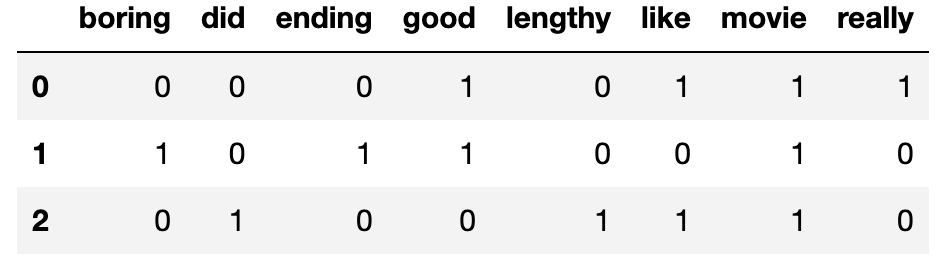

In [ ]:
# Gensim is a free open-source Python library for representing documents as semantic vectors, 
# as efficiently (computer-wise) and painlessly (human-wise) as possible.

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
! pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 13.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.7/28.7 MB 15.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 14.4 MB/s eta 0:00:0000:0100:01
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20430 sha256=5376db1084ac1e2f472a32608358ee112898dce728f5c39d1adfd7cd179e1fd4
  Stored in directory: /Users/kuldeepsabhnani/Library/Caches/pip/wheels/69/f5/e5/18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3507 sha256=229abbfb1ca331a914bc9477c35dbc2ee96cc43de26256b32ea4bb9452773ad5
  Stored in directory: /Users/kuldeepsabhnani/Li

In [9]:
import gensim
from gensim.models import Word2Vec, KeyedVectors

In [ ]:
# Load pre-trained model
# google has trained with its google news text data which had approx 3 million words
# Pre-trained vectors trained on a part of the Google News dataset (about 100 billion words). 
# The model contains 300-dimensional vectors for 3 million words and phrases. 

In [10]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [11]:
vec_king = wv['king']
vec_king

# vec_king is a 300-dimensional numerical representation of the word "king." Each dimension in this vector encodes some aspect of meaning, 
# such as gender, royalty, power, etc. This representation allows words that are semantically similar to be close to each other in the vector
# space (for example, the vector for "queen" will be similar to the vector for "king").

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [12]:
wv.most_similar('king')
# The numbers next to the words (e.g., 0.783) are cosine similarity scores indicating how close these words are to "king" in vector space

[('kings', 0.7138046622276306),
 ('queen', 0.6510956287384033),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204219460487366),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797566771507263),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

In [14]:
wv.most_similar('China')

[('Chinese', 0.7678081393241882),
 ('Beijing', 0.76484614610672),
 ('Taiwan', 0.7081156969070435),
 ('Chinas', 0.689917266368866),
 ('Shanghai', 0.6727433204650879),
 ('Guangdong', 0.6721152067184448),
 ('Hainan', 0.6360340714454651),
 ('Chinaâ_€_™', 0.6301891207695007),
 ('Hong_Kong', 0.624097466468811),
 ('Shenzhen', 0.6239034533500671)]